# COMP2200/COMP6200 Prac - Week 4

_Author: Benjamin Pope (benjamin.pope@mq.edu.au)_

---

In lectures this week we learned about fitting models to data - linear and logistic regression. In this practical we will use `scikit-learn` to model higher-dimensional data, including polynomial regression for the fish market dataset, with ridge and lasso regression. We will also look at logistic regression for the Titanic dataset.

**Please submit the completed notebook for this workshop to your GitHub Classroom for marking!**

Remember that to use a notebook, you need to run each cell. If left side of a cell says `[ ]`, it hasn't been run. If the left side
says something like `[25]` then it has been. Shift-Enter runs a cell;  if you look around the user interface, various other menu items can run several cells in sequence.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets, linear_model, preprocessing, metrics, model_selection
from glob import glob

---

We will first download dataset from kaggle platform.

Kaggle is an online platform that hosts data science competitions and offers a collaborative environment with diverse datasets and tools for building machine learning models.

There is a great dataset on Kaggle, which we looked at in part on Monday's lecture: the 'fish market dataset' containing dimensions and weight of fish. This is a good opportunity to [set up a Kaggle API key](https://www.kaggle.com/docs/api) if you haven't already, so that you can automatically download the dataset. 

In [2]:
# Load the Fish Market dataset from Kaggle

import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipullrathod/fish-market")
print("Path to dataset files:", path)

c:\Users\zhangxzh\.conda\envs\data_scinece_Wed\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\zhangxzh\.cache\kagglehub\datasets\vipullrathod\fish-market\versions\1


In [ ]:
# Plot this
fname = glob(path + "/*.csv")[0]
df = pd.read_csv(fname)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


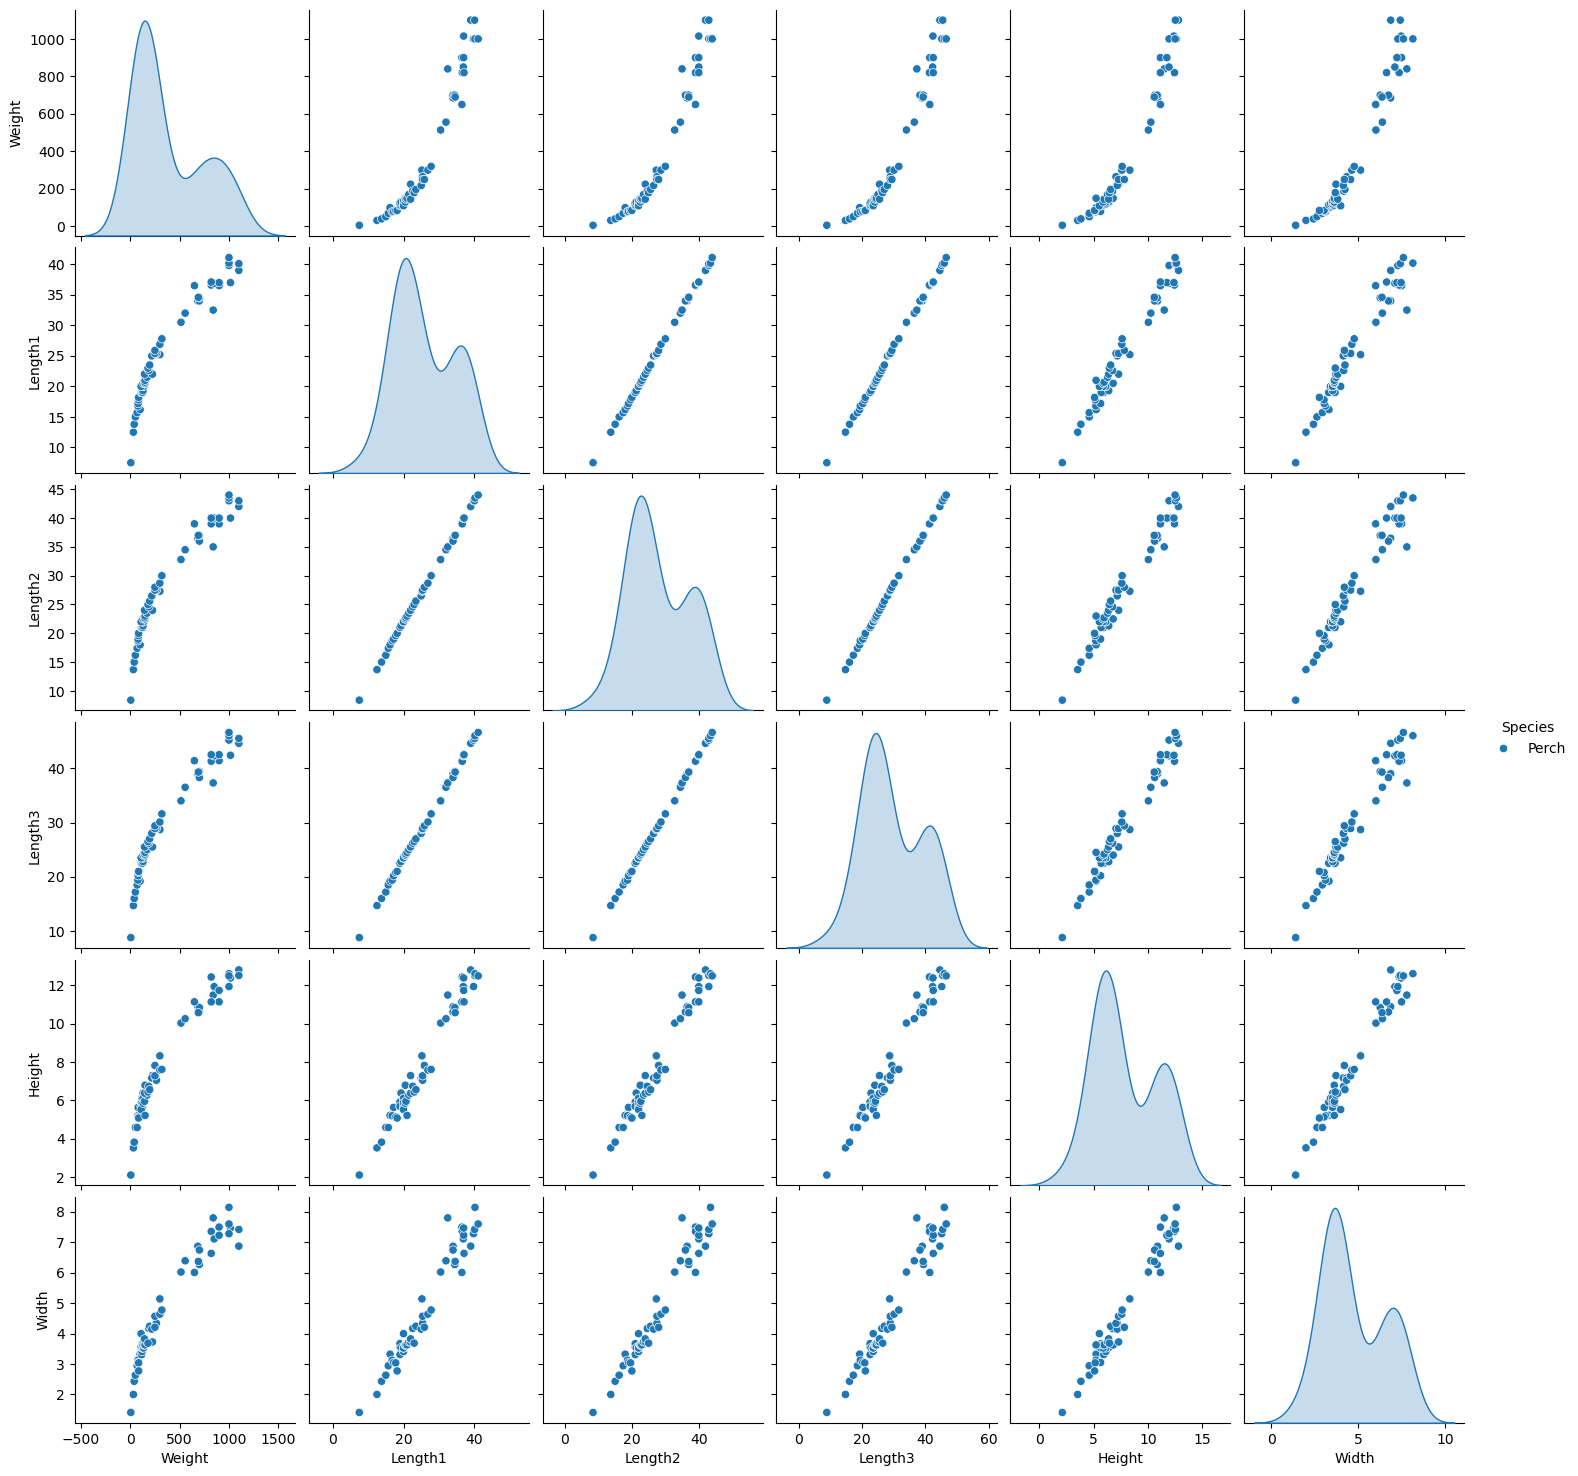

In [4]:
pair = sns.pairplot(df[df.Species=='Perch'],hue="Species",kind='scatter')

In [ ]:
# modify this code to include all species.

# Get a list of all unique species in the dataset
species_list = df['Species'].unique()
species_list

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

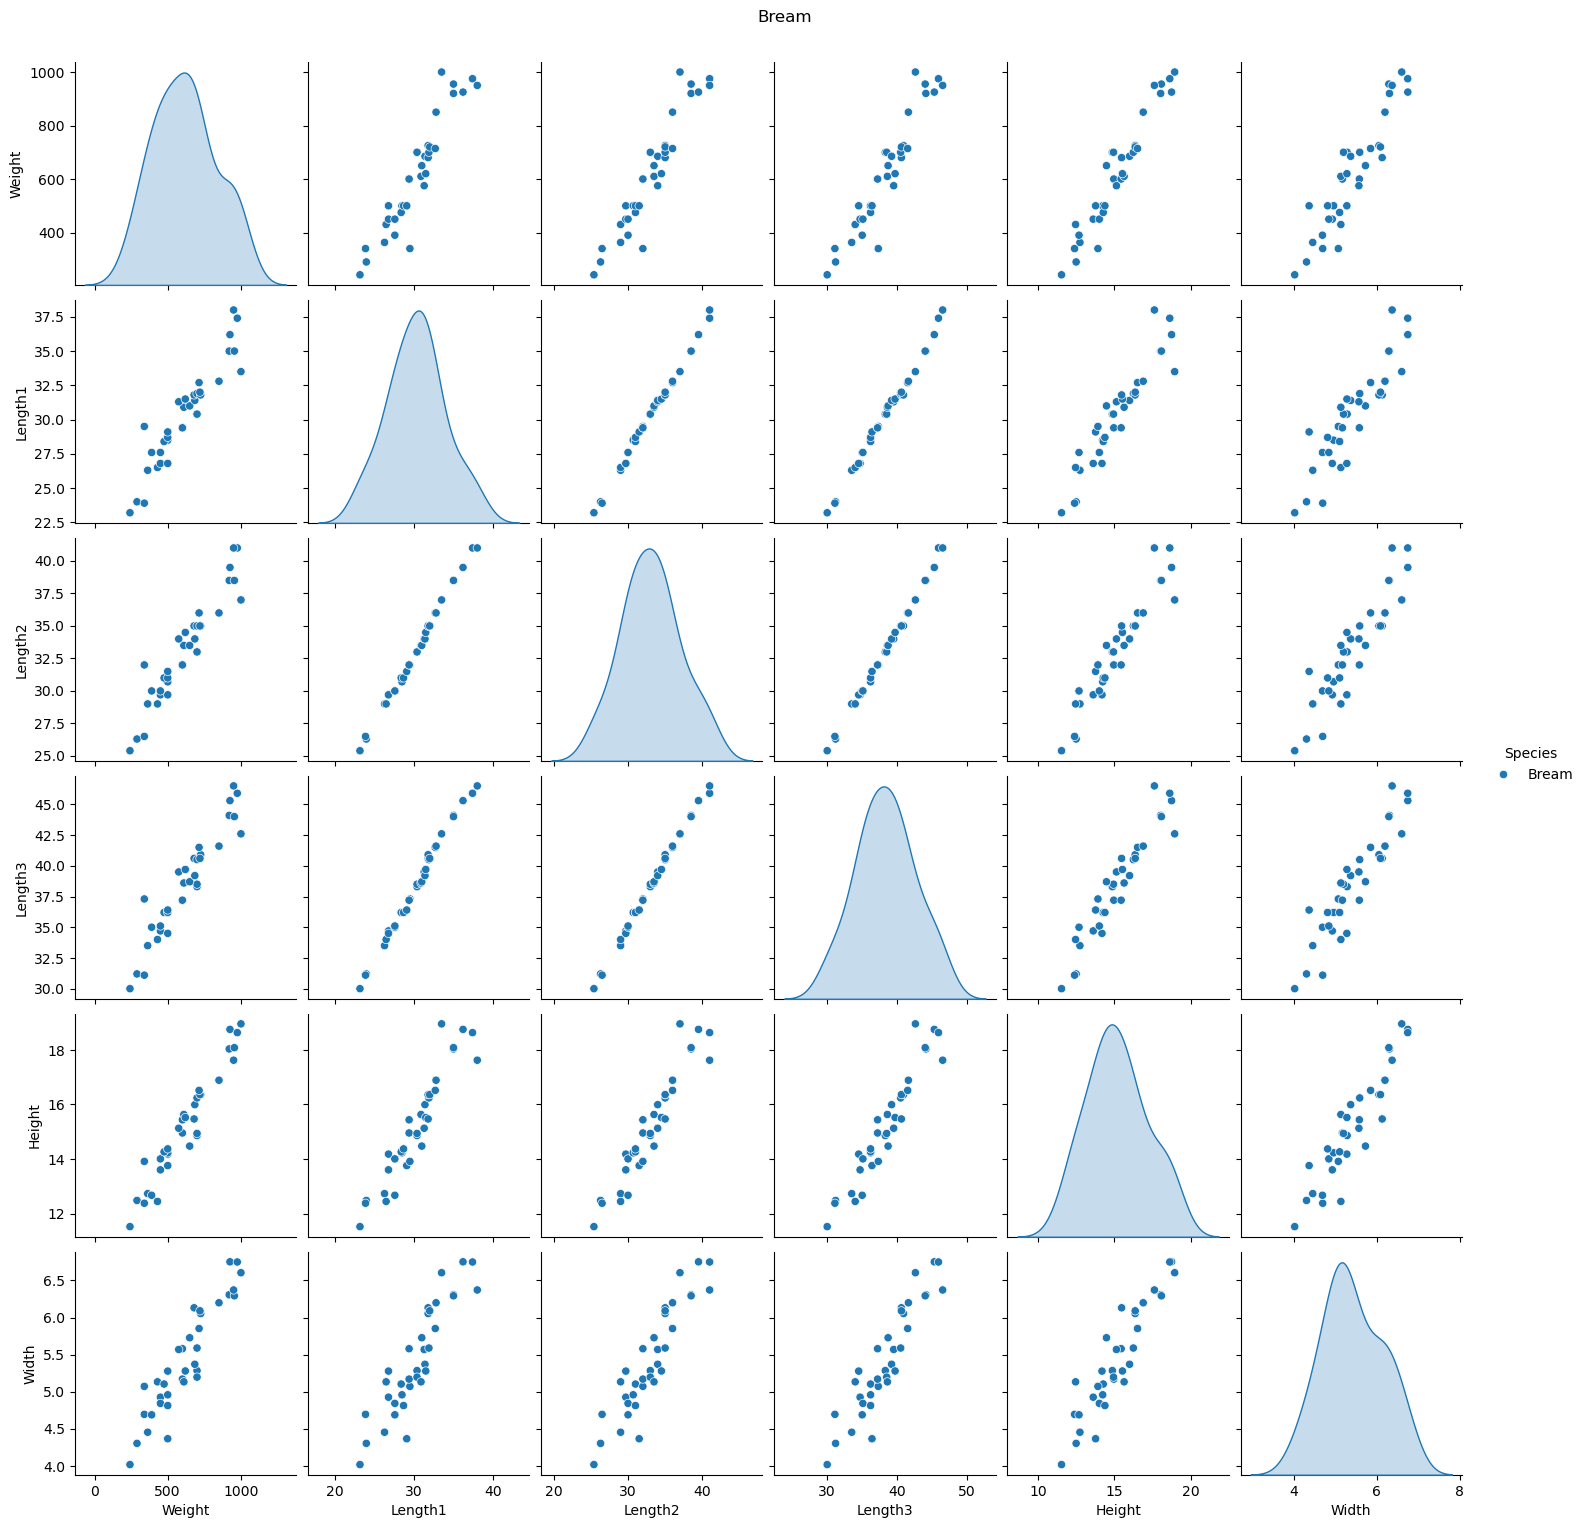

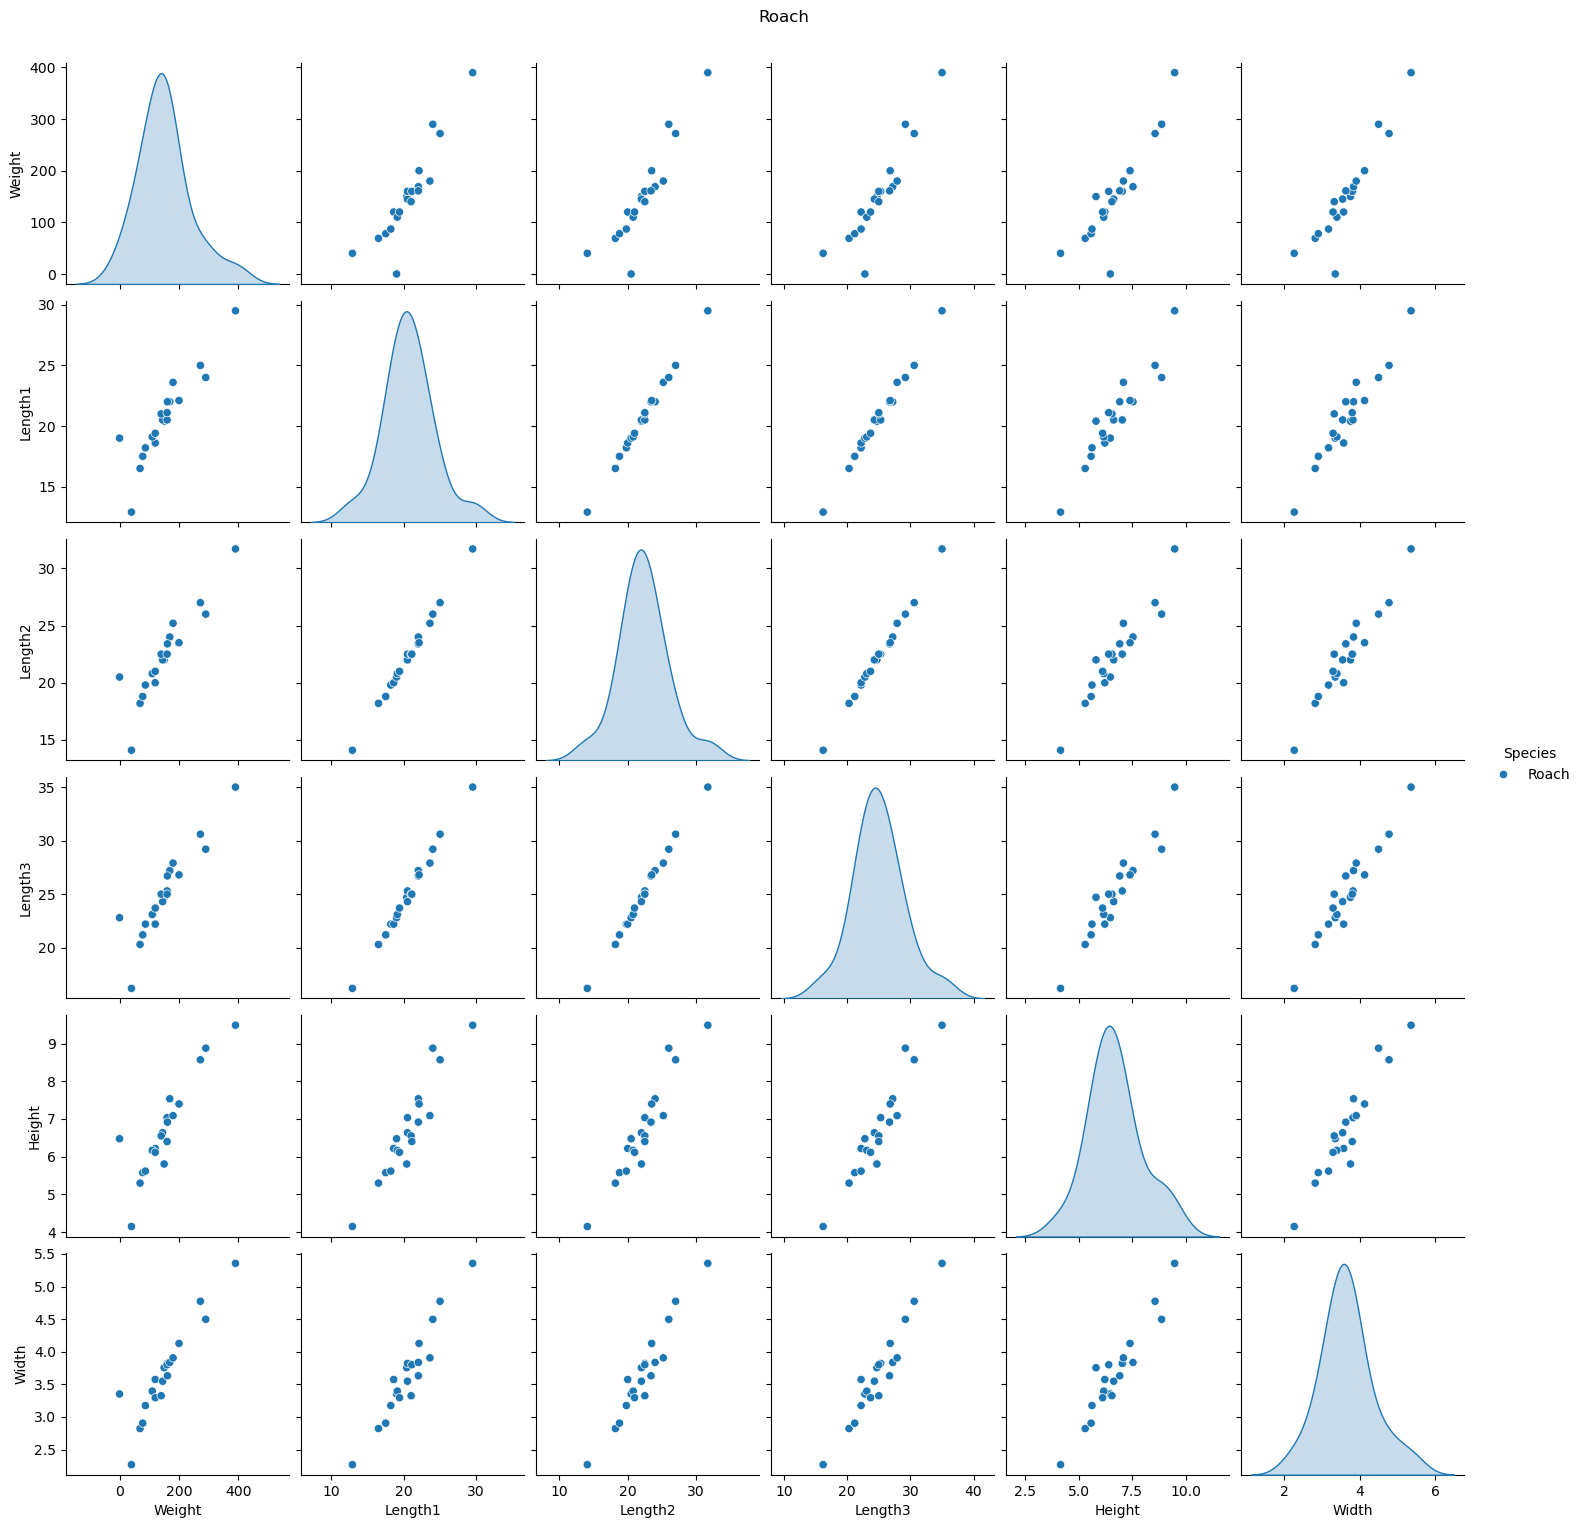

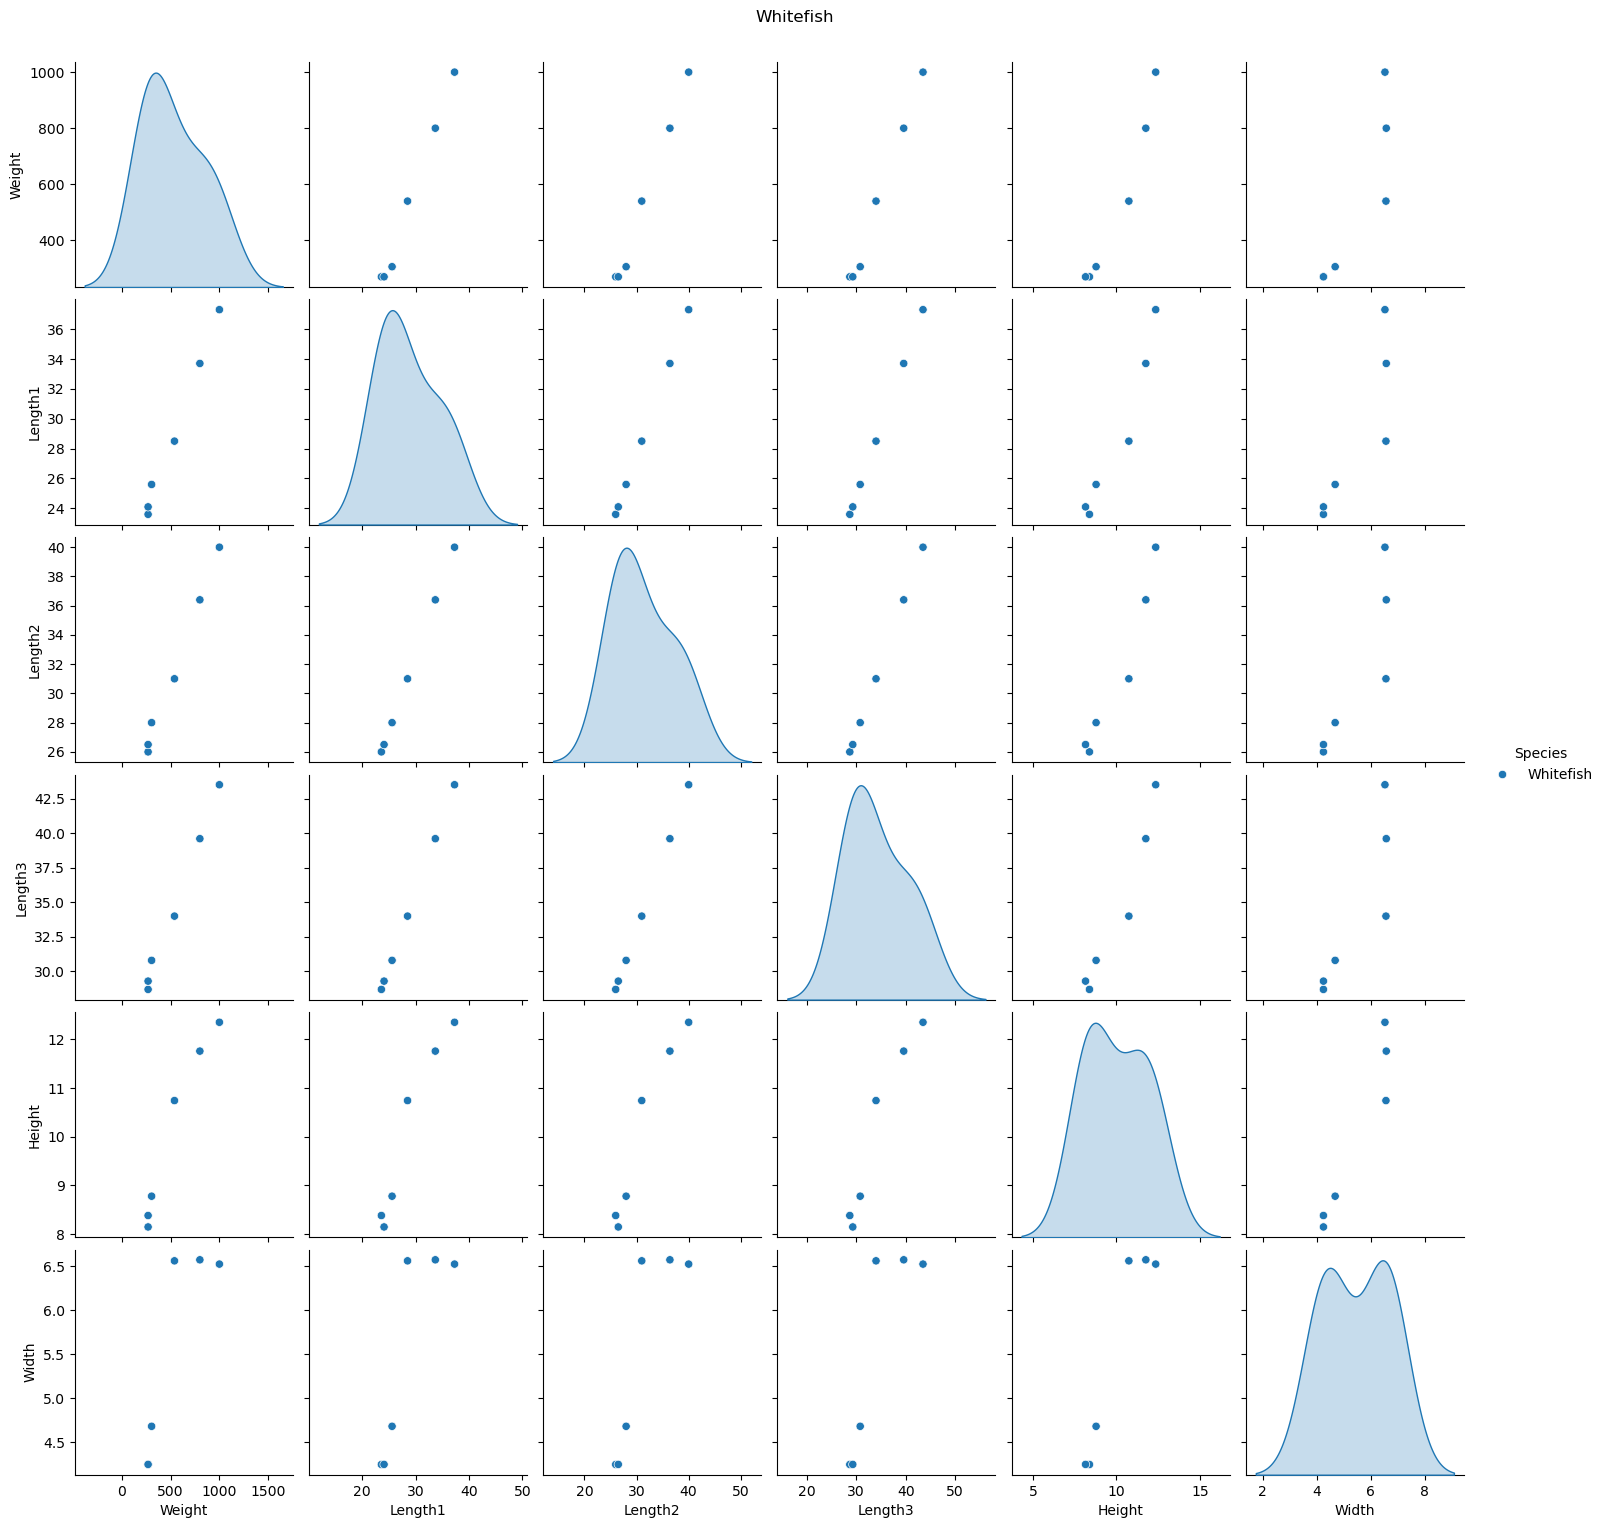

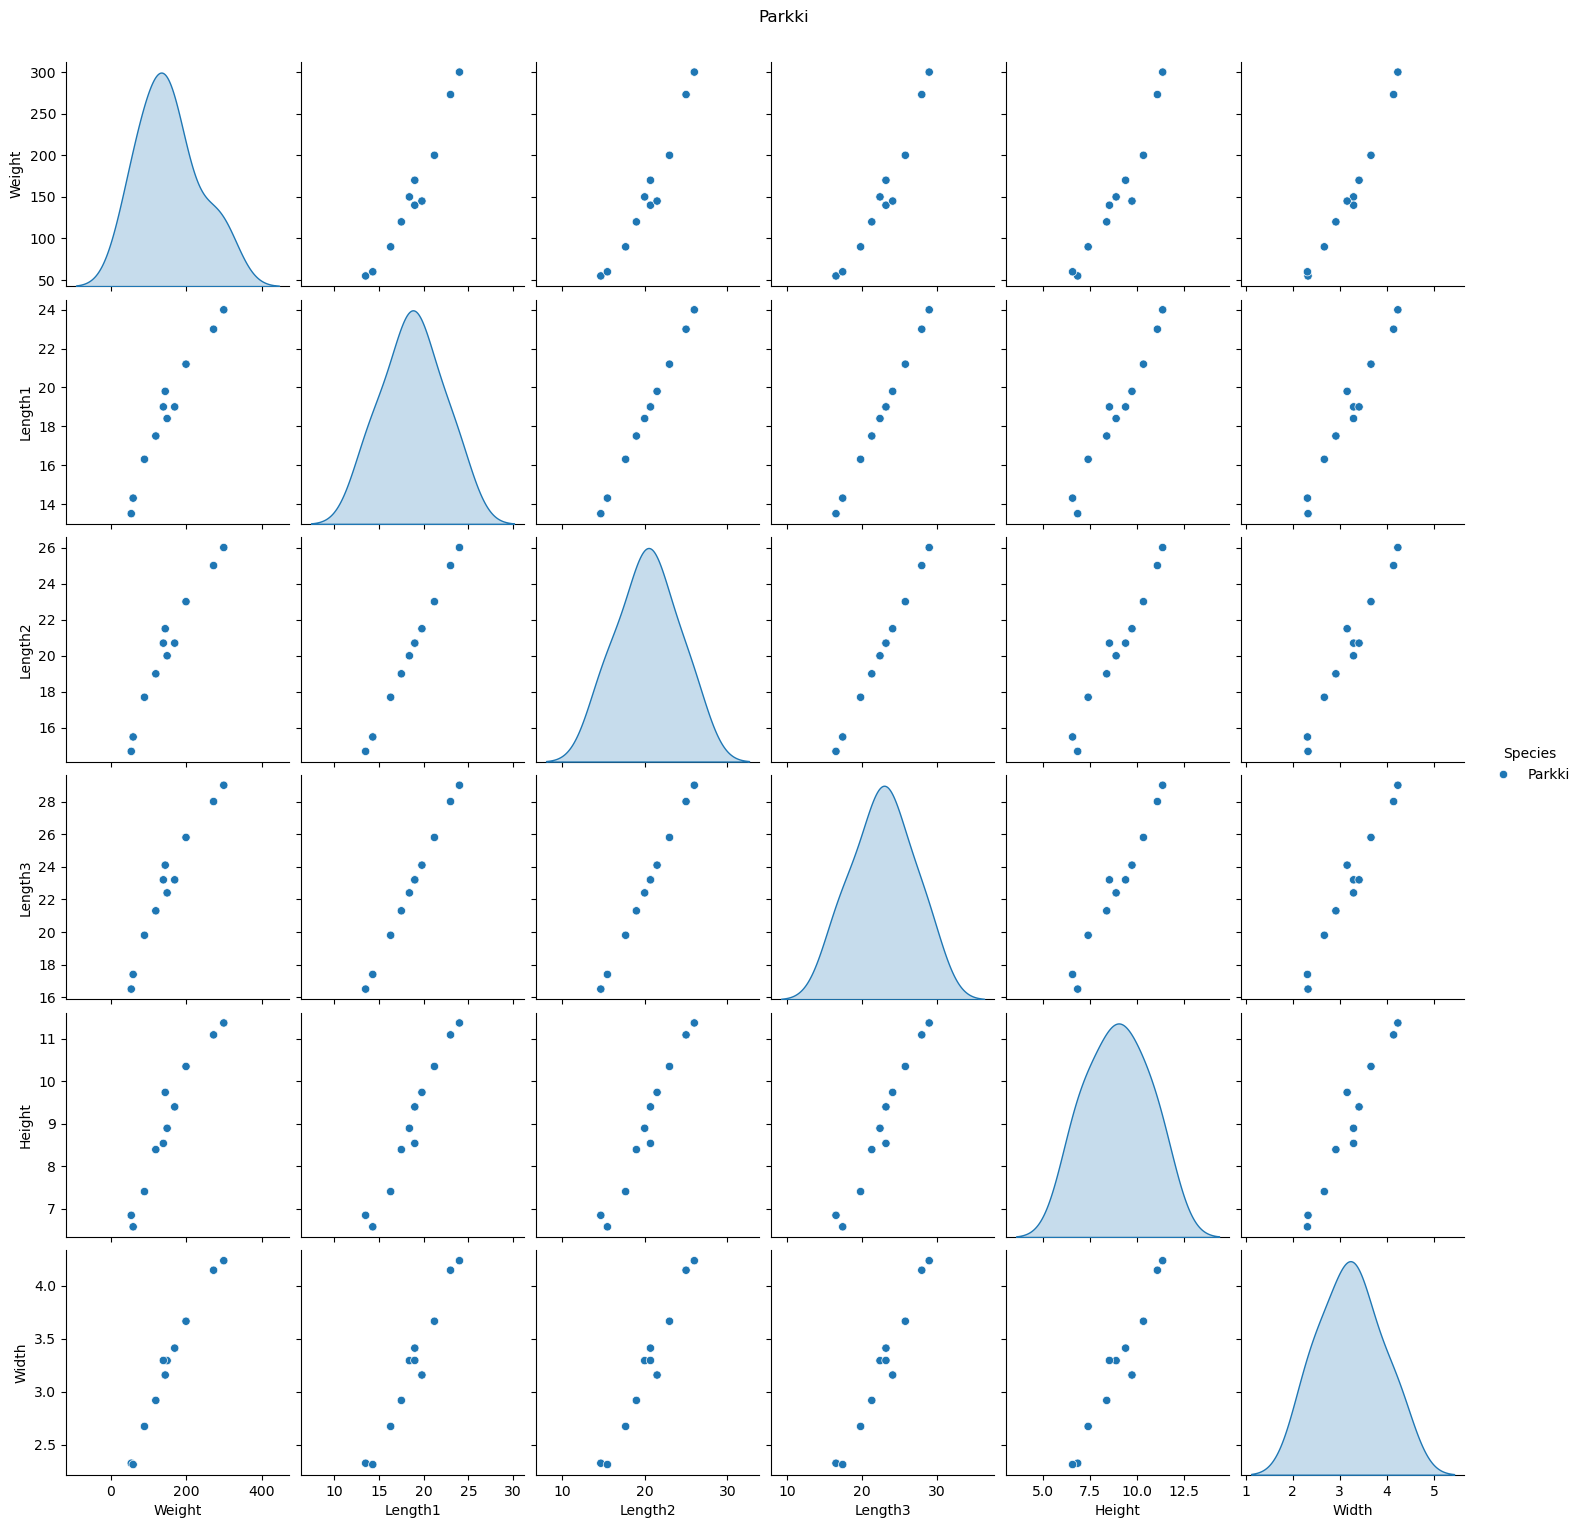

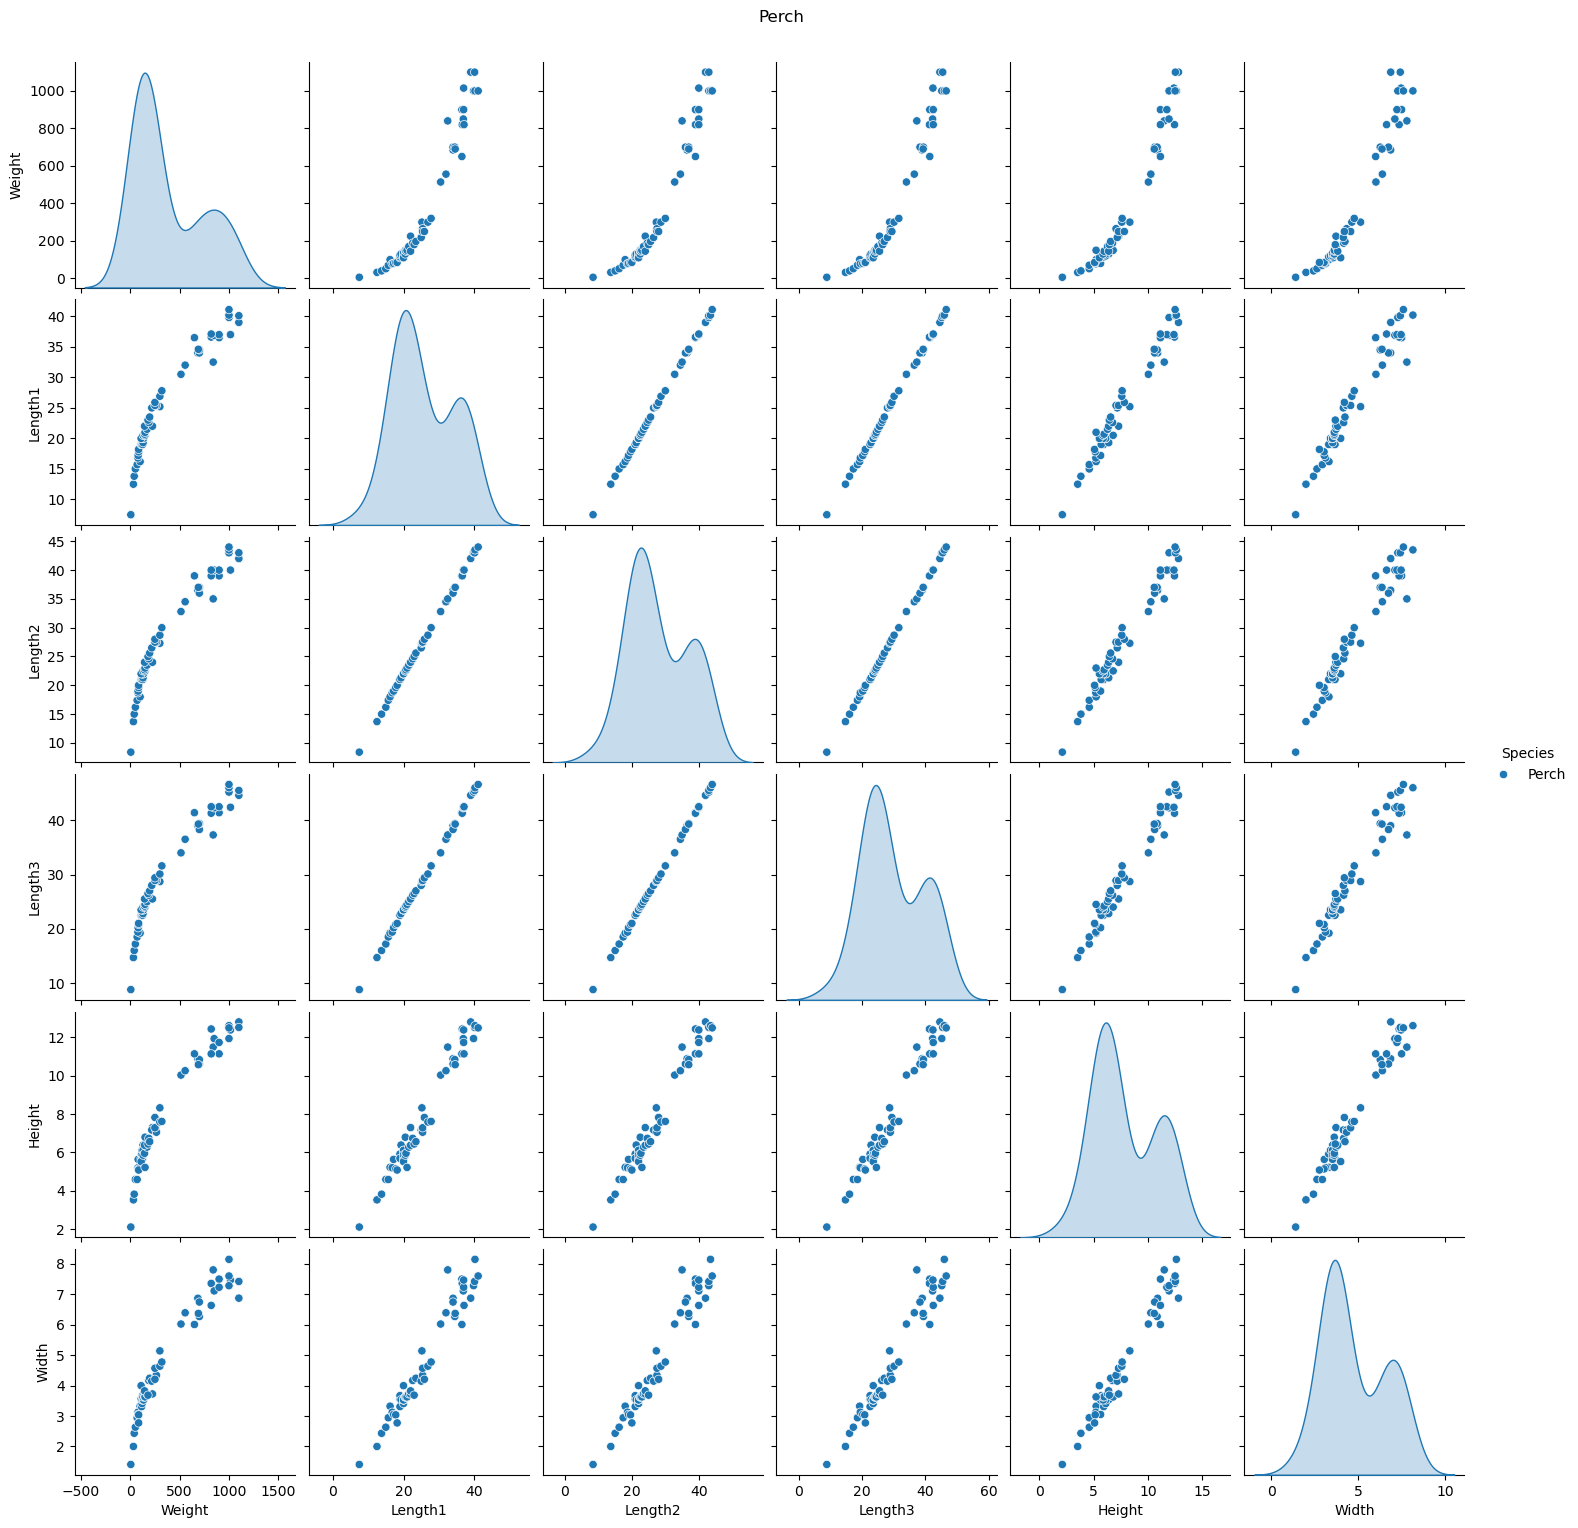

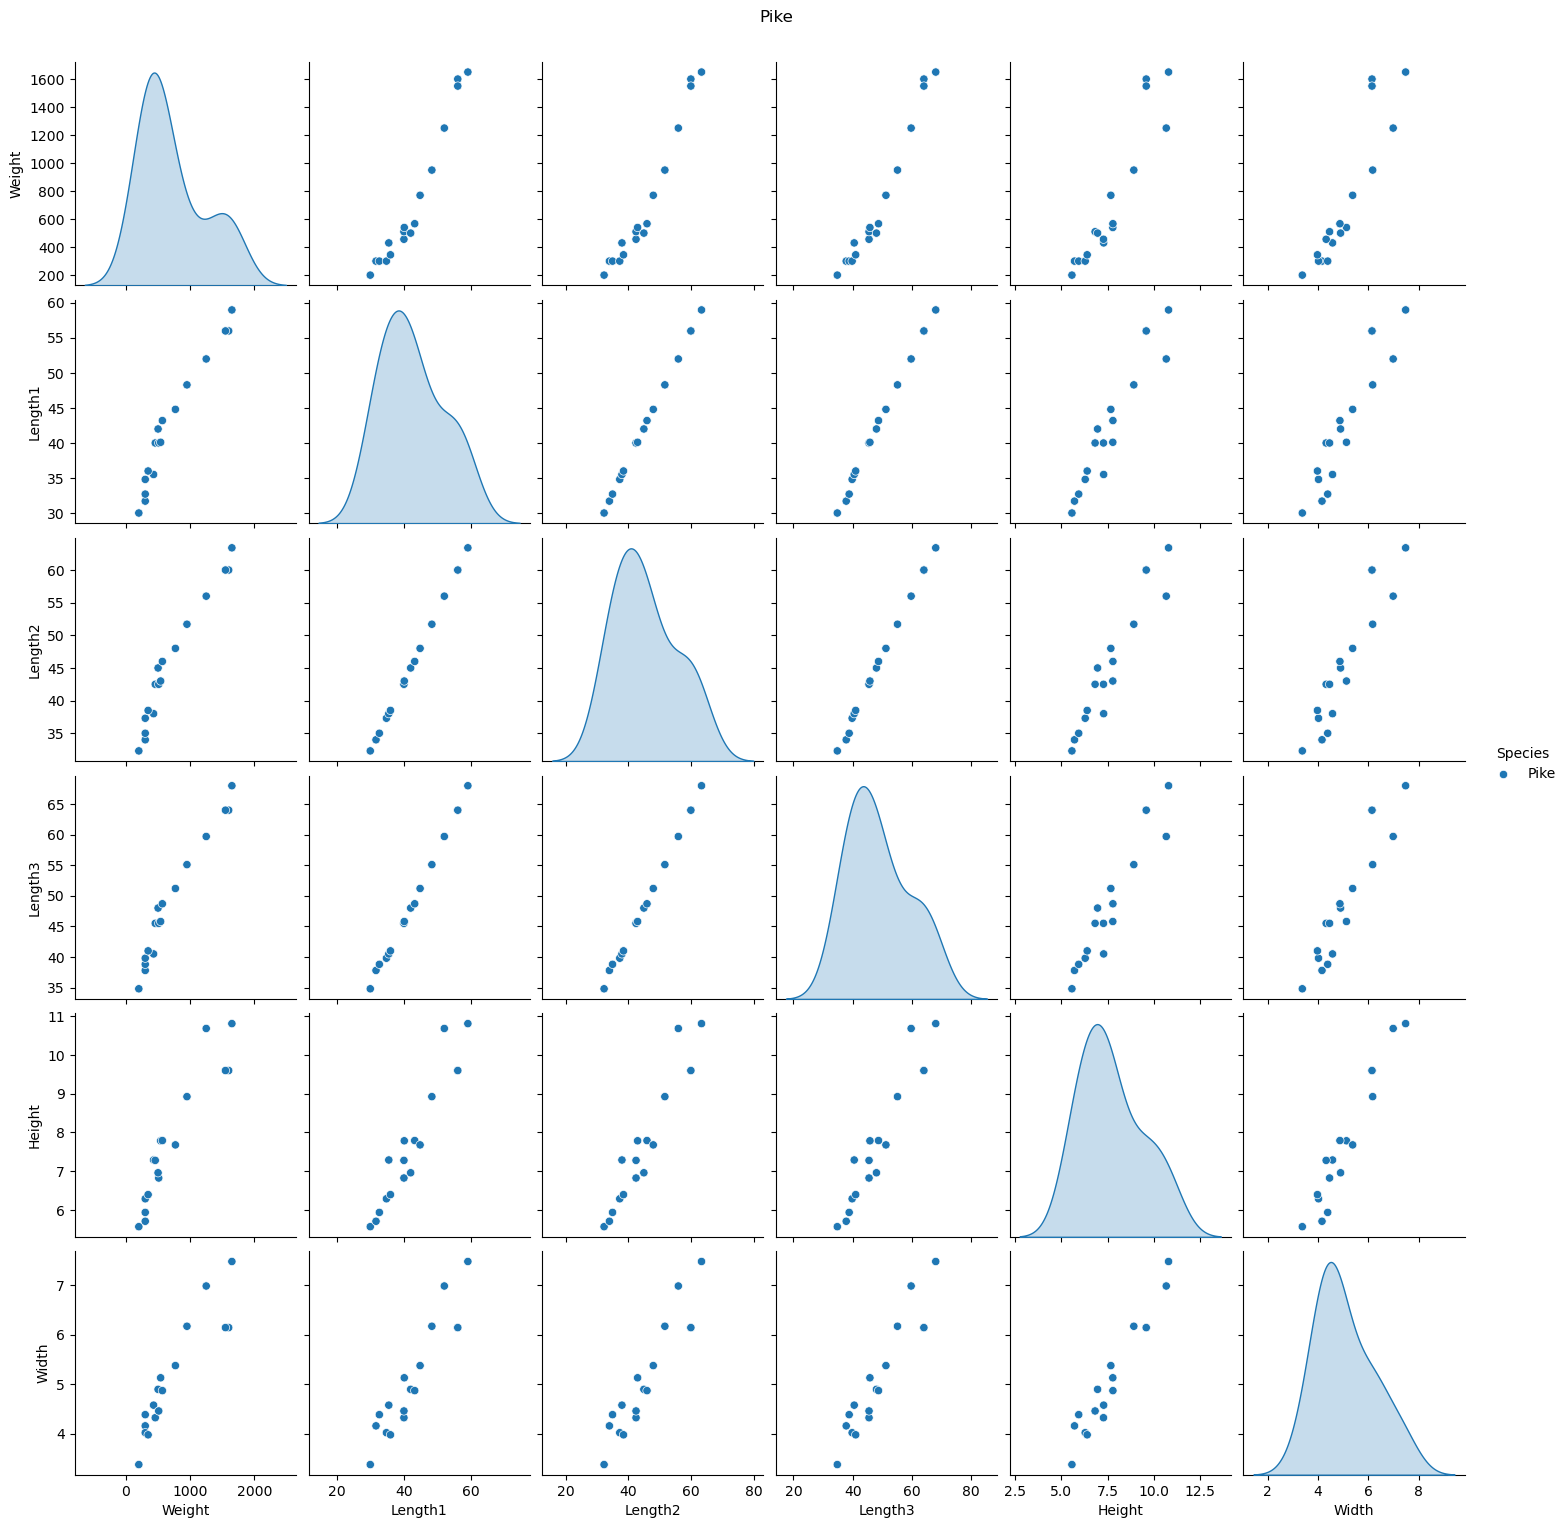

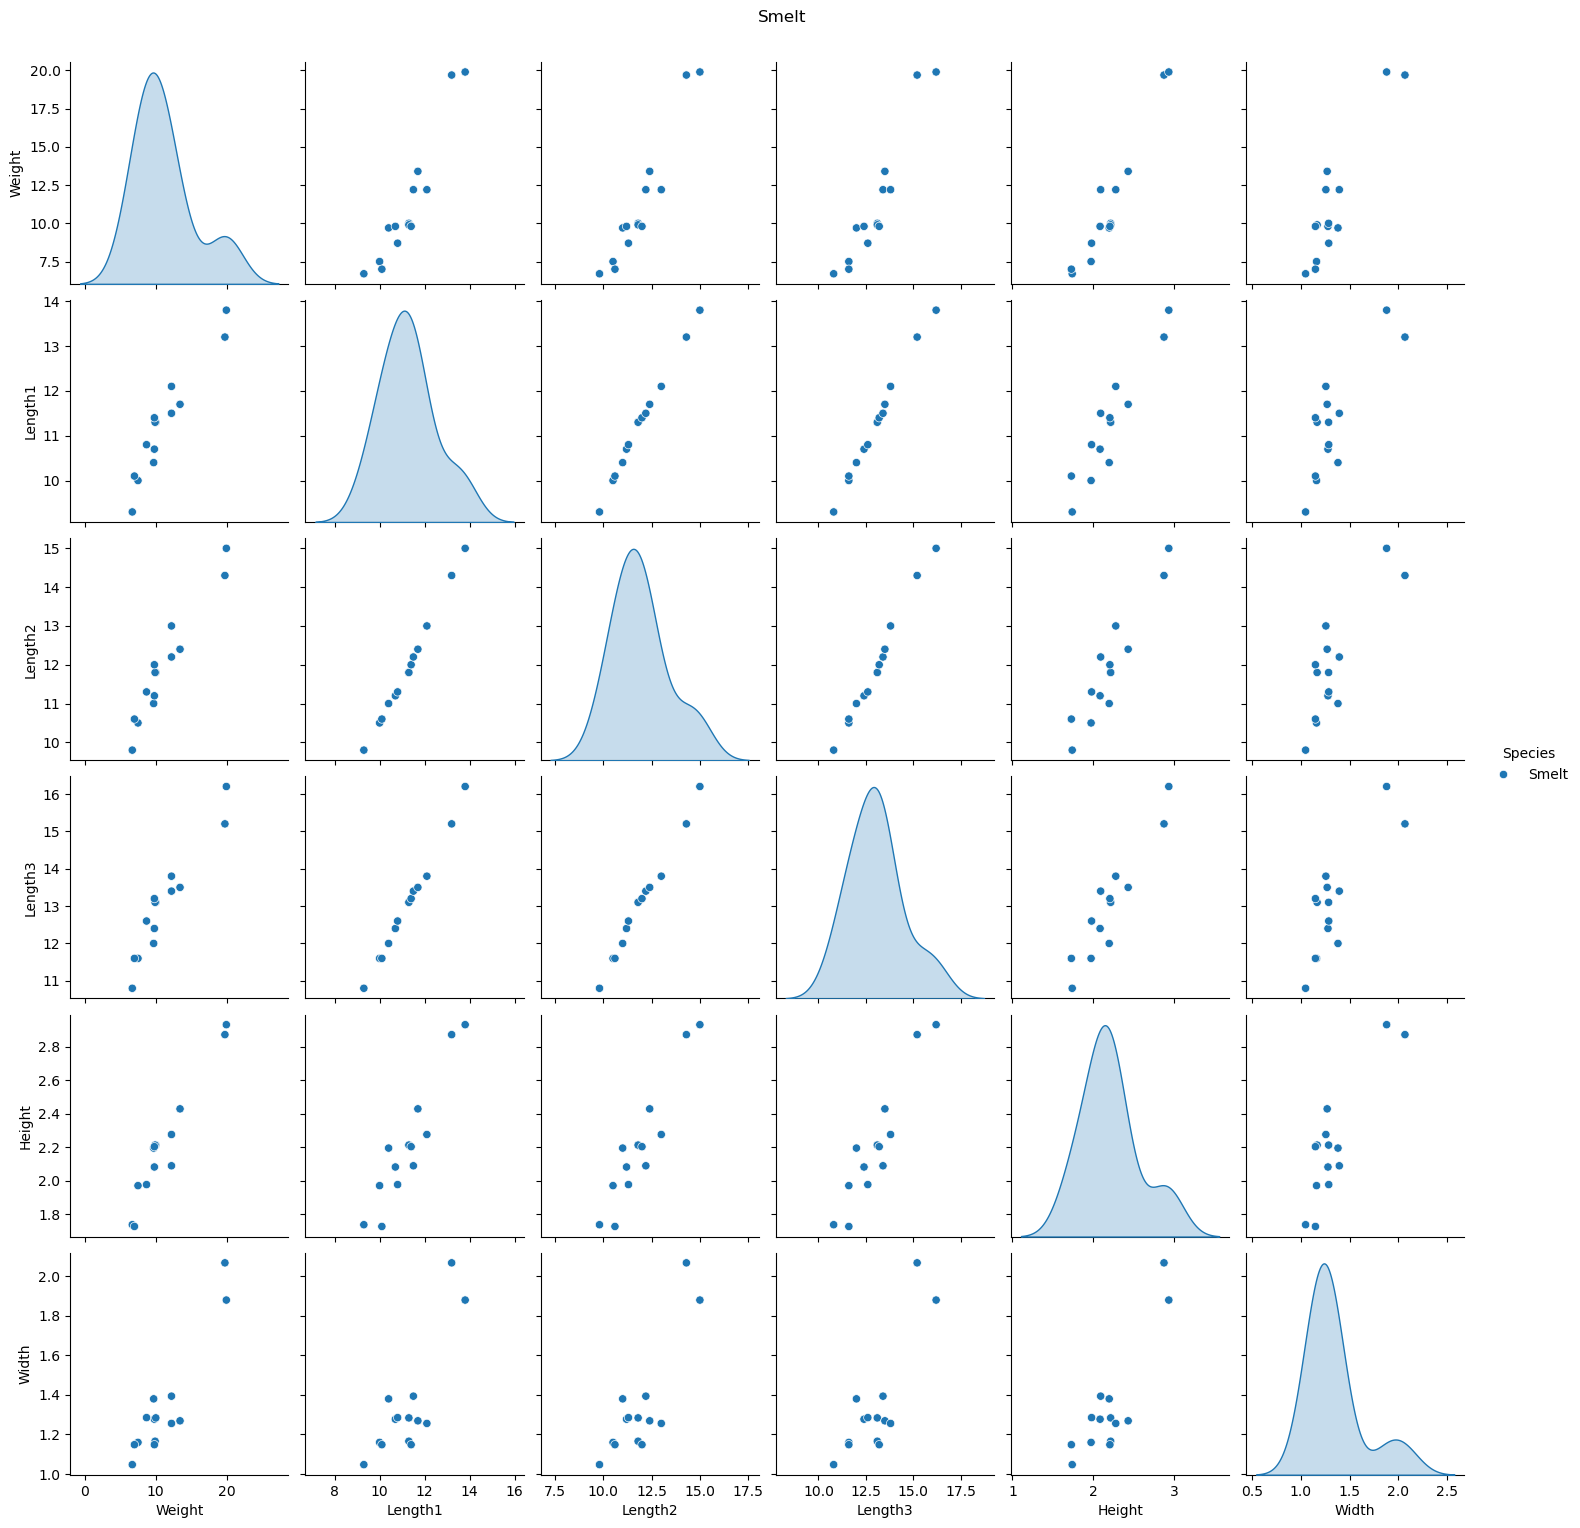

In [11]:
# Generate a pairplot for each species separately
for sp in species_list:
    # Create a pairplot for the subset, coloring by the "Species" column
    sub_pair = sns.pairplot(df[df['Species'] == sp], hue="Species", kind='scatter')
    
    # Set the title for the figure and adjust the vertical position
    sub_pair.fig.suptitle(sp, y=1.02)
    
    # Display the plot
    plt.show()

First you want to preprocess the data to be normalized. 

later you can try the advance option. (Advanced: skip this step and see what happens to the results of the regression models! We expect /ɪkˈspekt/ polynomial /ˌpɒliˈnəʊmiəl/ models to become unstable.)

In [ ]:
scaler = preprocessing.MinMaxScaler() # MinMaxScaler scales the data to a fixed range [0,1]
params = ['Weight','Length1','Length2','Length3','Height','Width'] # List of columns to scale

scaler.fit(df[params])# Fit the scaler /ˈskeɪlə(r)/ to the data for the specified columns, This computes the min and max values for each feature, which will be used for scaling /ˈskeɪlɪŋ/

MinMaxScaler()

In [ ]:
df[params] = scaler.transform(df[params])

In [ ]:
df['Weight'].max(),df['Weight'].min() # Check the maximum value of the 'Weight' column

(1.0, 0.0)

First, in the cell below, create test and training sets, using `sklearn.model_selection.train_test_split`. A good split is 80% training and 20% testing.

In [ ]:
train, test = model_selection.train_test_split(df[df.Species=='Perch'], test_size=0.2, random_state=0)

Let us begin by doing some linear regression between the linear dimensions of the fish, just to play around with some things that really are pretty linear. 

In the cell below, use `sklearn.linear_model.LinearRegression` to fit a linear model to the fish market data, showing examples for:
- # Width vs. Length1, Length2, Length3
- Height vs. Length1, Length2, Length3
- Width vs. Height
- Width vs both Length1 *and* Height - doing multilinear regression

For each of these, print the coefficients and the

- R-squared, 
- RMSE, and 
- MAE  

values for the training and testing data. Which performed the best on training? Which performed the best on test?

*Always* overplot the predictions on the data, and make sure to label the axes and the plot.


In [ ]:
model = linear_model.LinearRegression()
X = np.array(train[['Length1', 'Length2', 'Length3']])
Y = np.array(train['Width'])
model.fit(X, Y)
print("Model coefficients:", model.coef_)

Model coefficients: [ 0.77918331 -2.25653221  3.02639608]


# Linear Regression Formula

In a standard linear regression model with three features $ x_1, x_2, x_3 $ and target variable $ y $, the prediction $\hat{y}$ can be written as:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3
$$

- $\beta_0$ is the **intercept**, a constant term.
- $\beta_1, \beta_2, \beta_3$ are the **coefficients** (or weights) corresponding to each feature.
- $x_1, x_2, x_3$ are the **independent variables** (features).

The model attempts to find values for $\beta_0, \beta_1, \beta_2,$ and $\beta_3$ that minimize the sum of squared differences between the observed target values $y$ and the predicted values $\hat{y}$.


Advanced: use the design matrix from above to calculate the uncertainty in the coefficients, models from a multivariate normal distribution, and show the uncertainty in the model.

In [ ]:
residuals = model.predict(X) - Y  # Compute the residuals /rɪˈzɪdʒuəlz/ of the model on the training data set 
# Compute the uncertainty as the standard deviation of the residuals
# This gives an estimate of the typical prediction error (uncertainty)
uncertainty = np.std(residuals)
print("Uncertainty (standard deviation of residuals):", uncertainty)

Uncertainty (standard deviation of residuals): 0.055134787376767386


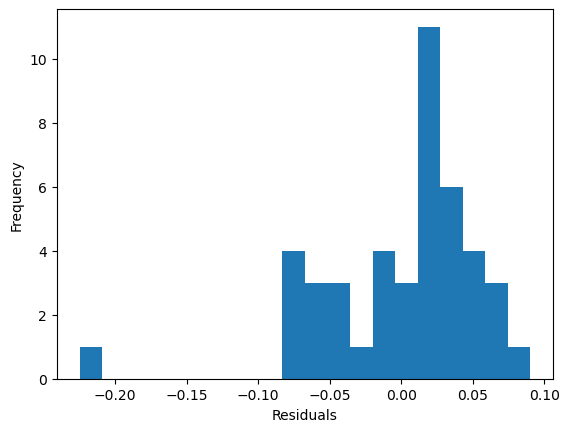

In [14]:
plt.hist(residuals, bins=20)  # Plot a histogram of the residuals
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
poly = preprocessing.PolynomialFeatures(degree=3) # Generate polynomial features up to degree 3, 

poly_features = poly.fit_transform(X) 
X.shape, poly_features.shape

((44, 3), (44, 20))

In [ ]:
model.fit(poly_features, Y)
print("Model coefficients:", model.coef_)


Model coefficients: [ 0.00000000e+00 -5.87364876e+01  6.76039568e+01 -9.12248513e+00
  1.84695691e+03 -1.90729570e+04  1.59826241e+04  1.47129710e+04
 -1.10917518e+04 -2.36929526e+03 -4.24070451e+05  6.72352845e+05
  6.12052131e+05  5.31531625e+05 -2.40453852e+06  5.75412054e+05
 -9.13818365e+05  2.20656903e+06 -1.00145512e+06  1.45955176e+05]


# Polynomial Regression Model (Degree 3) with Three Inputs

Consider a polynomial regression model of degree 3 with three input variables: $x_0$, $x_1$, and $x_2$. The model is expressed as:

$$
\begin{aligned}
f(x) =\; &\beta_0 + \beta_1 x_0 + \beta_2 x_1 + \beta_3 x_2\\[6pt]
&+ \beta_4 x_0^2 + \beta_5 x_0 x_1 + \beta_6 x_0 x_2 + \beta_7 x_1^2 + \beta_8 x_1 x_2 + \beta_9 x_2^2\\[6pt]
&+ \beta_{10} x_0^3 + \beta_{11} x_0^2 x_1 + \beta_{12} x_0^2 x_2 + \beta_{13} x_0 x_1^2 + \beta_{14} x_0 x_1 x_2\\[6pt]
&+ \beta_{15} x_0 x_2^2 + \beta_{16} x_1^3 + \beta_{17} x_1^2 x_2 + \beta_{18} x_1 x_2^2 + \beta_{19} x_2^3
\end{aligned}
$$

## Explanation

- **Intercept ($\beta_0$)**:  
  This is the constant term of the model.

- **Linear Terms**:  
  $\beta_1 x_0$, $\beta_2 x_1$, and $\beta_3 x_2$ represent the linear effects of each input variable.

- **Quadratic /kwɒˈdrætɪk/ Terms**:  
  $\beta_4 x_0^2$, $\beta_7 x_1^2$, and $\beta_9 x_2^2$ are the squared terms capturing the curvature of each input.  
  $\beta_5 x_0 x_1$, $\beta_6 x_0 x_2$, and $\beta_8 x_1 x_2$ are the interaction terms between pairs of variables.

- **Cubic /ˈkjuːbɪk/ Terms**:  
  $\beta_{10} x_0^3$, $\beta_{16} x_1^3$, and $\beta_{19} x_2^3$ capture higher-order effects.  
  The remaining cubic interaction terms ($\beta_{11} x_0^2 x_1$, $\beta_{12} x_0^2 x_2$, $\beta_{13} x_0 x_1^2$, $\beta_{14} x_0 x_1 x_2$, $\beta_{15} x_0 x_2^2$, $\beta_{17} x_1^2 x_2$, $\beta_{18} x_1 x_2^2$) model the combined influence of the variables.

Each coefficient $\beta_i$ reflects the weight or contribution of its corresponding term in predicting the target variable $f(x)$. Positive coefficients indicate a positive contribution to the prediction, while negative coefficients indicate a negative contribution.

This expanded polynomial formula is the same as the one generated by `PolynomialFeatures(degree=3)` when applied to three input features.


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  5.,  0.,  3., 15., 10.,
         2.,  4.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.14805256, -0.13497208, -0.1218916 , -0.10881112, -0.09573064,
        -0.08265016, -0.06956968, -0.0564892 , -0.04340872, -0.03032824,
        -0.01724776, -0.00416729,  0.00891319,  0.02199367,  0.03507415,
         0.04815463,  0.06123511,  0.07431559,  0.08739607,  0.10047655,
         0.11355703]),
 <BarContainer object of 20 artists>)

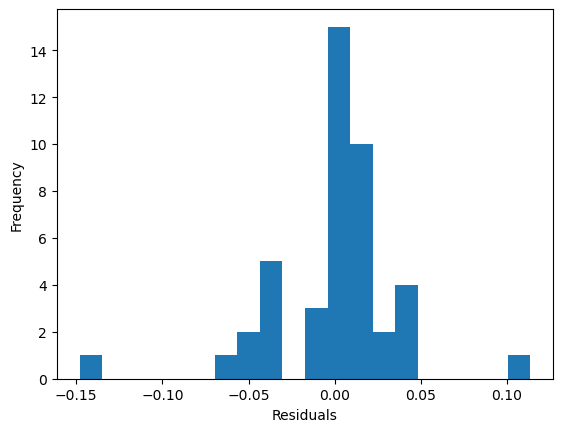

In [17]:
residuals = model.predict(poly_features) - Y
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.hist(residuals, bins=20)

In [ ]:
uncertainty = np.std(residuals)
print("Uncertainty (standard deviation of residuals):", uncertainty)

Uncertainty (standard deviation of residuals): 0.037667372711597084


There is an efficient way to automate taking multiple steps: `sklearn.pipeline.Pipeline`. 

We use it like this:

In [ ]:
from sklearn.pipeline import Pipeline

r2s = []
maes = []
rmses = []

r2s_train = []
maes_train = []
rmses_train = []

max_order = 10

# Define the input and output columns for the first example shown in the above instructions
# The input columns are 'Length1', 'Length2', and 'Length3'
# The output column is 'Height'
X = np.array(train[['Length1', 'Length2', 'Length3']])
Y = np.array(train['Width'])
X_test = np.array(test[['Length1', 'Length2', 'Length3']])
Y_test = np.array(test['Width'])

for polyfeatures in range(1, max_order):
    
    steps = [
        ("scalar", preprocessing.StandardScaler()), # scaling is especially important when using polynomial features
        ("poly", preprocessing.PolynomialFeatures(degree = polyfeatures)), # Generate polynomial features up to degree values of 'polyfeatures'
        ("model", linear_model.LinearRegression()) # Use a linear regression model
    ]

    pipe = Pipeline(steps)

    pipe.fit(X, Y)

    r2_train = metrics.r2_score(Y, pipe.predict(X))
    mae_train = metrics.median_absolute_error(Y, pipe.predict(X))
    rmse_train = np.sqrt(metrics.mean_squared_error(Y, pipe.predict(X)))
    r2s_train.append(r2_train) # r2
    maes_train.append(mae_train) # median absolute error
    rmses_train.append(rmse_train) # root mean squared error

    r2 = metrics.r2_score(Y_test, pipe.predict(X_test))
    mae = metrics.median_absolute_error(Y_test, pipe.predict(X_test))
    rmse = np.sqrt(metrics.mean_squared_error(Y_test, pipe.predict(X_test)))
    r2s.append(r2) # r2
    maes.append(mae) # median absolute error
    rmses.append(rmse) # root mean squared error
    print(f"Order: {polyfeatures}, Train R2: {r2_train:.6f}, mae_train: {mae_train:.6f}, rmse_train: {rmse_train:.6f}, R2_test: {r2:.6f}, MAE_test: {mae:.6f}, RMSE_test: {rmse:.5f}")

Order: 1, Train R2: 0.953555, mae_train: 0.034486, rmse_train: 0.055135, R2_test: 0.938003, MAE_test: 0.031173, RMSE_test: 0.05387
Order: 2, Train R2: 0.963199, mae_train: 0.019365, rmse_train: 0.049077, R2_test: 0.917845, MAE_test: 0.035110, RMSE_test: 0.06201
Order: 3, Train R2: 0.978322, mae_train: 0.013209, rmse_train: 0.037667, R2_test: 0.854234, MAE_test: 0.039490, RMSE_test: 0.08260
Order: 4, Train R2: 0.998459, mae_train: 0.000000, rmse_train: 0.010043, R2_test: -85.446637, MAE_test: 0.216398, RMSE_test: 2.01153
Order: 5, Train R2: 0.998497, mae_train: 0.000000, rmse_train: 0.009918, R2_test: -19619.067182, MAE_test: 9.679189, RMSE_test: 30.30424
Order: 6, Train R2: 0.998513, mae_train: 0.000000, rmse_train: 0.009866, R2_test: -1160798.422395, MAE_test: 19.531582, RMSE_test: 233.09437
Order: 7, Train R2: 0.998516, mae_train: 0.000000, rmse_train: 0.009856, R2_test: -1035686254.395456, MAE_test: 366.543327, RMSE_test: 6962.53351
Order: 8, Train R2: 0.998516, mae_train: 0.000000,

In [ ]:
from sklearn.pipeline import Pipeline

r2s = []
maes = []
rmses = []

r2s_train = []
maes_train = []
rmses_train = []

max_order = 10

# Use the 'Height' column as the target variable, and the 'Length1', 'Length2', and 'Length3' columns as the features (The second example shown in the instructions above, and you can try the other examples as well)
X = np.array(train[['Length1', 'Length2', 'Length3']])
Y = np.array(train['Height'])
X_test = np.array(test[['Length1', 'Length2', 'Length3']])
Y_test = np.array(test['Height'])

for polyfeatures in range(1, max_order):
    
    steps = [
        ("scalar", preprocessing.StandardScaler()), # scaling is especially important when using polynomial features
        ("poly", preprocessing.PolynomialFeatures(degree = polyfeatures)), # Generate polynomial features up to degree values of 'polyfeatures'
        ("model", linear_model.LinearRegression()) # Use a linear regression model
    ]

    pipe = Pipeline(steps)

    pipe.fit(X, Y)

    r2_train = metrics.r2_score(Y, pipe.predict(X))
    mae_train = metrics.median_absolute_error(Y, pipe.predict(X))
    rmse_train = np.sqrt(metrics.mean_squared_error(Y, pipe.predict(X)))
    r2s_train.append(r2_train) # r2
    maes_train.append(mae_train) # median absolute error
    rmses_train.append(rmse_train) # root mean squared error

    r2 = metrics.r2_score(Y_test, pipe.predict(X_test))
    mae = metrics.median_absolute_error(Y_test, pipe.predict(X_test))
    rmse = np.sqrt(metrics.mean_squared_error(Y_test, pipe.predict(X_test)))
    r2s.append(r2) # r2
    maes.append(mae) # median absolute error
    rmses.append(rmse) # root mean squared error
    print(f"Order: {polyfeatures}, Train R2: {r2_train:.6f}, mae_train: {mae_train:.6f}, rmse_train: {rmse_train:.6f}, R2_test: {r2:.6f}, MAE_test: {mae:.6f}, RMSE_test: {rmse:.5f}")

Order: 1, Train R2: 0.972031, mae_train: 0.021993, rmse_train: 0.028133, R2_test: 0.971578, MAE_test: 0.010474, RMSE_test: 0.02620
Order: 2, Train R2: 0.979394, mae_train: 0.014339, rmse_train: 0.024147, R2_test: 0.952858, MAE_test: 0.010155, RMSE_test: 0.03375
Order: 3, Train R2: 0.984369, mae_train: 0.007917, rmse_train: 0.021031, R2_test: 0.887658, MAE_test: 0.008342, RMSE_test: 0.05210
Order: 4, Train R2: 0.993697, mae_train: 0.000001, rmse_train: 0.013355, R2_test: -18556.432684, MAE_test: 1.884750, RMSE_test: 21.17337
Order: 5, Train R2: 0.993762, mae_train: 0.000000, rmse_train: 0.013286, R2_test: -60243.004452, MAE_test: 11.754818, RMSE_test: 38.14942
Order: 6, Train R2: 0.994458, mae_train: 0.000000, rmse_train: 0.012523, R2_test: -57669101.316027, MAE_test: 11.632657, RMSE_test: 1180.32771
Order: 7, Train R2: 0.996886, mae_train: 0.000002, rmse_train: 0.009387, R2_test: -627158351219.787231, MAE_test: 6763.366033, RMSE_test: 123089.10475
Order: 8, Train R2: 0.996881, mae_trai

Using this framework, explore what polynomial order fits the data best, and generate the summary statistics for the training *and* testing data.

Which polynomial order fits the data best? Do you notice any overfitting - where the training data fits very well, but the testing data does not?

Answers:

## Regularization

We have a lot of features in the design matrix as we go to high polynomial order - too many relative to the amount of data. This can lead to overfitting - but fortunately [we can deal with that using regularization](https://arxiv.org/abs/2101.07256).

Let's start with Ridge /rɪdʒ/ regression. Mathematically, this puts an L2 penalty /ˈpenəlti/ on the size of the coefficients: where L2 means the sum of the squares of the coefficients. The Lasso /læˈsuː/ model, on the other hand, puts an L1 penalty on the coefficients: where L1 means the sum of the *absolute values* of the coefficients. In this case your likelihood will be changed to:

$$
\mathcal{L_\text{Ridge}} = \underbrace{\sum_i \left( y_i - \sum_j X_{ij} \beta_j \right)^2}_{\text{log-likelihood}} + \underbrace{\alpha \sum_j \beta_j^2}_{\text{penalty}}
$$

$$
\mathcal{L_\text{Lasso}} = \underbrace{\sum_i \left( y_i - \sum_j X_{ij} \beta_j \right)^2}_{\text{log-likelihood}} + \underbrace{\alpha \sum_j |\beta_j|}_{\text{penalty}}
$$

where $\alpha$ is an arbitrary hyperparameter that controls the strength of the penalty.

In [ ]:
X = np.array(train[['Length1', 'Length2', 'Length3']])
Y = np.array(train['Width'])

X_test = np.array(test[['Length1', 'Length2', 'Length3']])
Y_test = np.array(test['Width'])
# Use it like this
ridge = linear_model.Ridge(alpha = 0.1) # play with alpha
ridge.fit(X, Y)
print("Model coefficients:", ridge.coef_) 
print("Train R2 error:", metrics.r2_score(Y, ridge.predict(X)))
print("Train Mean Absolute Error:", metrics.mean_absolute_error(Y, ridge.predict(X)))
print("Train Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y, ridge.predict(X))))
print("Test R2 error:", metrics.r2_score(Y_test, ridge.predict(X_test)))
print("Test Mean Absolute Error:", metrics.mean_absolute_error(Y_test, ridge.predict(X_test)))
print("Test Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, ridge.predict(X_test))))


Model coefficients: [0.48999734 0.48515043 0.4884025 ]
Train R2 error: 0.9517788885113136
Train Mean Absolute Error: 0.041709644592119836
Train Root Mean Squared Error: 0.05617881273040327
Test R2 error: 0.9409778103790234
Test Mean Absolute Error: 0.040375430498975025
Test Root Mean Squared Error: 0.05256066490619881


In [32]:
lasso = linear_model.Lasso(alpha = 0.002) # play with alpha
lasso.fit(X, Y)
print("Model coefficients:", lasso.coef_) 
print("Train R2 error:", metrics.r2_score(Y, lasso.predict(X)))
print("Train Mean Absolute ErrAor:", metrics.mean_absolute_error(Y, lasso.predict(X)))
print("Train Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y, lasso.predict(X))))
print("Test R2 error:", metrics.r2_score(Y_test, lasso.predict(X_test)))
print("Test Mean Absolute Error:", metrics.mean_absolute_error(Y_test, lasso.predict(X_test)))
print("Test Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, lasso.predict(X_test))))

Model coefficients: [1.41210553 0.         0.        ]
Train R2 error: 0.9495254446027006
Train Mean Absolute ErrAor: 0.04239638983981376
Train Root Mean Squared Error: 0.057476484825743065
Test R2 error: 0.9416521937994348
Test Mean Absolute Error: 0.039287591456209775
Test Root Mean Squared Error: 0.05225952498905837


In the cell below, use a pipeline and a for loop, like above, to fit Ridge and Lasso models to the fish market data with a range of regularizations: which set of coefficients give you the best performance on the test data?

In [ ]:
from sklearn.pipeline import Pipeline

r2s = []
maes = []
rmses = []

r2s_train = []
maes_train = []
rmses_train = []

max_order = 10

X = np.array(train[['Length1', 'Length2', 'Length3']])
Y = np.array(train['Width'])
X_test = np.array(test[['Length1', 'Length2', 'Length3']])
Y_test = np.array(test['Width'])



for penalty in np.arange(0, 10, 1):  #todo: play with the range of penalty， the smaller the penalty, the more the model will overfit, the larger the penalty, the more the model will underfit, try to find the best range of penalty based on the one of the metrics (r2_test / mae_test / rmse_test) below on the test set
    polyfeatures = 3
    steps = [
        ("scalar", preprocessing.StandardScaler()), # scaling is especially important when using polynomial features
        ("poly", preprocessing.PolynomialFeatures(degree = polyfeatures)), # Generate polynomial features up to degree values of 'polyfeatures'
        ("model", linear_model.Ridge(alpha = penalty)) # Use a linear regression model
    ]

    pipe = Pipeline(steps)

    pipe.fit(X, Y)

    r2_train = metrics.r2_score(Y, pipe.predict(X))
    mae_train = metrics.median_absolute_error(Y, pipe.predict(X))
    rmse_train = np.sqrt(metrics.mean_squared_error(Y, pipe.predict(X)))
    r2s_train.append(r2_train) # r2
    maes_train.append(mae_train) # median absolute error
    rmses_train.append(rmse_train) # root mean squared error

    r2_test = metrics.r2_score(Y_test, pipe.predict(X_test))
    mae_test = metrics.median_absolute_error(Y_test, pipe.predict(X_test))
    rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, pipe.predict(X_test)))
    r2s.append(r2_test) # r2
    maes.append(mae_test) # median absolute error
    rmses.append(rmse_test) # root mean squared error
    print(f"Penalty: {penalty:.3f}, Train R2: {r2_train:.5f}, mae_train: {mae_train:.5f}, rmse_train: {rmse_train:.5f}, R2_test: {r2_test:.5f}, MAE_test: {mae_test:.5f}, RMSE_test: {rmse_test:.5f}")


Penalty: 0.000, Train R2: 0.97832, mae_train: 0.01321, rmse_train: 0.03767, R2_test: 0.85423, MAE_test: 0.03949, RMSE_test: 0.08260
Penalty: 1.000, Train R2: 0.95834, mae_train: 0.03208, rmse_train: 0.05222, R2_test: 0.93731, MAE_test: 0.03416, RMSE_test: 0.05417
Penalty: 2.000, Train R2: 0.95710, mae_train: 0.03005, rmse_train: 0.05299, R2_test: 0.93898, MAE_test: 0.02862, RMSE_test: 0.05344
Penalty: 3.000, Train R2: 0.95563, mae_train: 0.03020, rmse_train: 0.05389, R2_test: 0.93988, MAE_test: 0.02364, RMSE_test: 0.05305
Penalty: 4.000, Train R2: 0.95389, mae_train: 0.03139, rmse_train: 0.05494, R2_test: 0.94005, MAE_test: 0.01983, RMSE_test: 0.05297
Penalty: 5.000, Train R2: 0.95191, mae_train: 0.03250, rmse_train: 0.05610, R2_test: 0.93960, MAE_test: 0.01744, RMSE_test: 0.05317
Penalty: 6.000, Train R2: 0.94974, mae_train: 0.03245, rmse_train: 0.05735, R2_test: 0.93864, MAE_test: 0.01744, RMSE_test: 0.05359
Penalty: 7.000, Train R2: 0.94743, mae_train: 0.03226, rmse_train: 0.05866, 

In [ ]:
from sklearn.pipeline import Pipeline

r2s = []
maes = []
rmses = []

r2s_train = []
maes_train = []
rmses_train = []

max_order = 10

X = np.array(train[['Length1', 'Length2', 'Length3']])
Y = np.array(train['Width'])
X_test = np.array(test[['Length1', 'Length2', 'Length3']])
Y_test = np.array(test['Width'])



for penalty in np.arange(0, 10, 1):  # based on the best penalty value you found above, try to find the best range of polyfeatures based on the one of the metrics (r2_test / mae_test / rmse_test) below on the test set, if we use 
    polyfeatures = 3
    steps = [
        ("scalar", preprocessing.StandardScaler()), # scaling is especially important when using polynomial features
        ("poly", preprocessing.PolynomialFeatures(degree = polyfeatures)), # Generate polynomial features up to degree values of 'polyfeatures'
        ("model", linear_model.Ridge(alpha = penalty)) # Use a linear regression model
    ]

    pipe = Pipeline(steps)

    pipe.fit(X, Y)

    r2_train = metrics.r2_score(Y, pipe.predict(X))
    mae_train = metrics.median_absolute_error(Y, pipe.predict(X))
    rmse_train = np.sqrt(metrics.mean_squared_error(Y, pipe.predict(X)))
    r2s_train.append(r2_train) # r2
    maes_train.append(mae_train) # median absolute error
    rmses_train.append(rmse_train) # root mean squared error

    r2_test = metrics.r2_score(Y_test, pipe.predict(X_test))
    mae_test = metrics.median_absolute_error(Y_test, pipe.predict(X_test))
    rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, pipe.predict(X_test)))
    r2s.append(r2_test) # r2
    maes.append(mae_test) # median absolute error
    rmses.append(rmse_test) # root mean squared error
    print(f"Penalty: {penalty:.3f}, Train R2: {r2_train:.5f}, mae_train: {mae_train:.5f}, rmse_train: {rmse_train:.5f}, R2_test: {r2_test:.5f}, MAE_test: {mae_test:.5f}, RMSE_test: {rmse_test:.5f}")


Penalty: 0.000, Train R2: 0.97832, mae_train: 0.01321, rmse_train: 0.03767, R2_test: 0.85423, MAE_test: 0.03949, RMSE_test: 0.08260
Penalty: 1.000, Train R2: 0.95834, mae_train: 0.03208, rmse_train: 0.05222, R2_test: 0.93731, MAE_test: 0.03416, RMSE_test: 0.05417
Penalty: 2.000, Train R2: 0.95710, mae_train: 0.03005, rmse_train: 0.05299, R2_test: 0.93898, MAE_test: 0.02862, RMSE_test: 0.05344
Penalty: 3.000, Train R2: 0.95563, mae_train: 0.03020, rmse_train: 0.05389, R2_test: 0.93988, MAE_test: 0.02364, RMSE_test: 0.05305
Penalty: 4.000, Train R2: 0.95389, mae_train: 0.03139, rmse_train: 0.05494, R2_test: 0.94005, MAE_test: 0.01983, RMSE_test: 0.05297
Penalty: 5.000, Train R2: 0.95191, mae_train: 0.03250, rmse_train: 0.05610, R2_test: 0.93960, MAE_test: 0.01744, RMSE_test: 0.05317
Penalty: 6.000, Train R2: 0.94974, mae_train: 0.03245, rmse_train: 0.05735, R2_test: 0.93864, MAE_test: 0.01744, RMSE_test: 0.05359
Penalty: 7.000, Train R2: 0.94743, mae_train: 0.03226, rmse_train: 0.05866, 

What do you think of the final results? What are the main coefficients?

Advanced: apply these methods to the entire fish market dataset. Do you get consistent results for the polynomial order for each species?

In [ ]:
# Get a list of all unique species in the dataset
species_list = df['Species'].unique()
species_list

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
train, test = model_selection.train_test_split(df[df.Species=='Roach'], test_size=0.2) # change the species name for different species

---

## Logistic Regression

We learned about logistic regression in lectures; now let's apply it to a real dataset. The fish market is too small for interesting logistic regression; and furthermore the fish species separate out very well in the feature space, so there is no challenge.

Let us now look at a dataset from the University of California, Irvine (UCI) Machine Learning Repository, about wine quality. This lists a number of wines - red and white - and continuous-valued chemical properties. One goal is to predict the quality of the wine based on these properties; but this is also a good opportunity to use a large dataset for logistic regression, to simply predict whether the wine is red or white.

In [ ]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
wine = fetch_ucirepo(id=186) 
wine_df = pd.DataFrame(wine.data.original)

In [ ]:
# normalize the data
scaler = preprocessing.MinMaxScaler()
print(list(wine_df.keys().copy())) # there are a lot of features - if you use all of these, it's too easy!

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'color']


In [ ]:
params = [ 'residual_sugar', 'volatile_acidity'] # pick some features - try starting with 2 and going from there   /ˈvɒlətaɪl/ /əˈsɪdɪti/


small_wine = wine_df[[*params,'color']] # The second line of code creates a new DataFrame called `small_wine` by selecting a subset of columns from the original `wine_df` DataFrame. Specifically, it selects the columns listed in the `params` variable (which are `'fixed_acidity'` and `'volatile_acidity'`) along with the `'color'` column. The syntax `[*params, 'color']` uses the unpacking operator (`*`) to expand the list `params` so that its items are included alongside the `'color'` string, effectively resulting in a list like `['fixed_acidity', 'volatile_acidity', 'color']`.


scaler.fit(small_wine[params]) # Fit the scaler to the data for the specified columns and compute the min and max values for each feature, which will be used for scaling
small_wine[params] = scaler.transform(small_wine[params]) # Apply the scaling to the specified columns
small_wine.head()

C:\Users\zhangxzh\AppData\Local\Temp\ipykernel_41576\3843339052.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_wine[params] = scaler.transform(small_wine[params]) # Apply the scaling to the specified columns


,residual_sugar,volatile_acidity,color
0,0.019939,0.413333,red
1,0.030675,0.533333,red
2,0.026074,0.453333,red
3,0.019939,0.133333,red
4,0.019939,0.413333,red


In [43]:
train, test = model_selection.train_test_split(small_wine, test_size=0.2)

Always visualize your data:

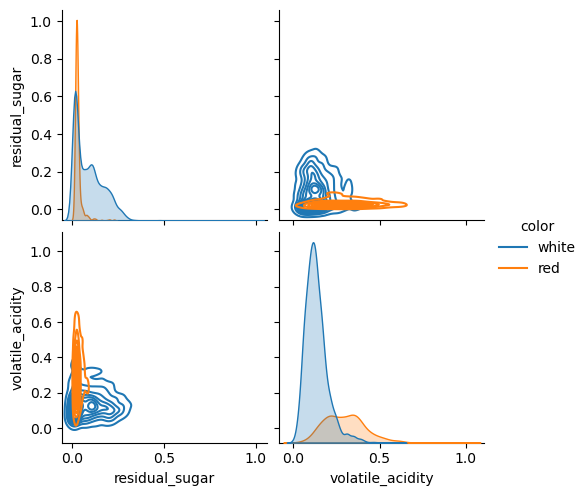

In [44]:
sns.pairplot(train, hue='color', kind='kde') # The `kind='kde'` argument specifies that the pairplot should display kernel density estimates (KDEs) instead of scatter plots. This can be useful when the data is continuous and there are many data points, as it provides a smoother representation of the data distribution. The `hue='color'` argument specifies that the KDEs should be colored according to the values in the `'color'` column, which indicates whether the wine is red or white.

Initialize a logistic regression model:

In [ ]:
logistic = linear_model.LogisticRegression()
logistic.C = 1e5 # play with C - this may need to vary - to do this systematically, use a loop and test # the parameter C represents the inverse of the regularization strength. A large value of C means that the model will try to fit the training data as well as possible, while a small value of C means that the model will try to find a simpler model that generalizes better to new data.
X = np.array(train[params])
logistic.fit(X, train.color=='red')

LogisticRegression(C=100000.0)

In [46]:
logistic.predict(X)[0:20], (train.color=='red')[0:20]

(array([False, False, False, False, False,  True, False, False, False,
        False, False, False, False,  True, False,  True, False, False,
         True, False]),
 4052    False
 6412    False
 3478    False
 4980    False
 5430    False
 776      True
 5893    False
 5038    False
 4040    False
 2157    False
 6450    False
 1292     True
 3234    False
 1232     True
 3473    False
 3920    False
 3352    False
 3697    False
 753      True
 5291    False
 Name: color, dtype: bool)

There is a great way to visualize the decision boundaries of a logistic regression model; let's import some things to do that:

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay # this is for showing decision boundaries for 2d classifiers
# there are some nice blue and red colourmaps
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu # Red-Blue colormap for the decision boundary display 
# cm_bright = ListedColormap(["#FF0000", "#0000FF"])
cm_bright = ListedColormap(["#FF0000", "#FFFFFF"])


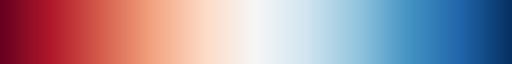

In [48]:
cm = plt.cm.RdBu
cm

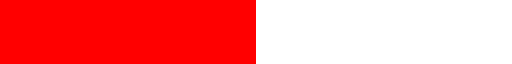

In [49]:
cm_bright

c:\Users\zhangxzh\.conda\envs\data_scinece_Wed\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:194: UserWarning: The following kwargs were not used by contour: 'fill_contours'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


(-0.1, 1.1)

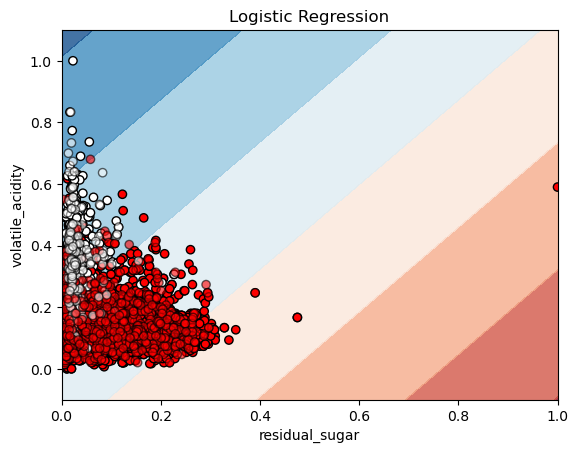

In [ ]:
ax = plt.gca() # be able to access the axis so you can plot multiple things overlaid

DecisionBoundaryDisplay.from_estimator(
    logistic, X, cmap=cm, alpha=0.8, eps=0.1, fill_contours=True, ax=ax
)

# from_estimator(logistic, X, ...) uses the trained logistic model to compute and display the decision boundary for the given data X.
# cmap=cm specifies the color map (in this case, cm is defined as plt.cm.RdBu).
# alpha=0.8 sets the transparency level of the decision boundary regions.
# eps=0.1 extends the plotting region slightly beyond the minimum and maximum of the data.
# fill_contours=True fills in the decision boundary regions with colors.
# ax=ax indicates that the plot should be drawn on the axes object ax


# Plot the training points
ax.scatter(X[:, 0], X[:, 1], c=train.color=='red', cmap=cm_bright, edgecolors="k")

# Plot the testing points
X_test = np.array(test[params])
ax.scatter(X_test[:, 0], X_test[:, 1], c=test.color=='red', cmap=cm_bright, alpha=0.6, edgecolors="k")

ax.set_title("Logistic Regression")
ax.set_xlabel(f"{params[0]}")
ax.set_ylabel(f"{params[1]}")
ax.set_xlim(0,1)
ax.set_ylim(-0.1,1.1)

Now we want to quantify the performance of the model. We can use the confusion matrix, which is a 2x2 matrix where the rows are the true classes and the columns are the predicted classes. The diagonal elements are the number of correct predictions, and the off-diagonal elements are the number of incorrect predictions.

Text(0.5, 1.0, 'Confusion Matrix')

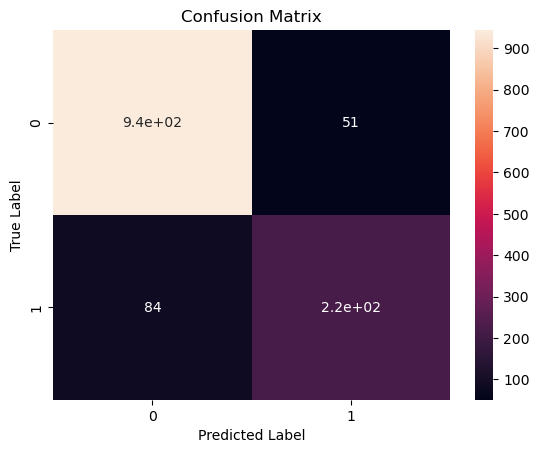

In [ ]:
# confusion matrix
confusion = metrics.confusion_matrix(test.color=='red', logistic.predict(X_test))
ax = sns.heatmap(confusion, annot=True)
# Set the x and y axis labels
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.title('Confusion Matrix')

How well do they separate? Do some sets of parameters overlap more or less? Try out the above calculation for different features. You may like to use for loops or other scripting to do this automatically. Store the results of the confusion matrix each time, and what percentage of data are on the diagonal vs off.

One way to quantify the performance of a classifier is to use the ROC curve. This is a plot of the true positive rate (TPR) against the false positive rate (FPR) as you vary the threshold for the classifier. Ideally, the true positive rate should be very high while keeping the false positive rate very low! The area under the curve (AUC) is a measure of the performance of the classifier: 1 is perfect (ie all true positives are found, no false positives are found), 0.5 is random (ie true positive rate = false positive rate = random).

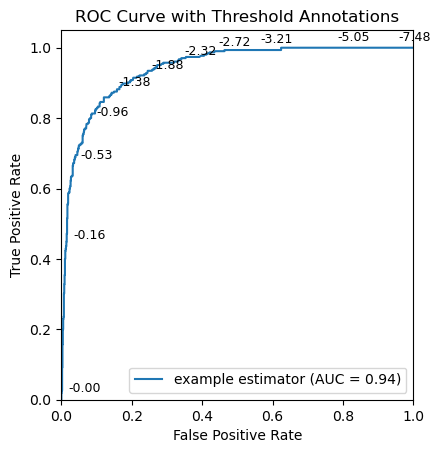

In [ ]:
# Define the true labels: True if the wine is red, otherwise False
y = test.color == 'red'

# Get the predicted log probabilities for the positive class (red wine) from the logistic model
pred = logistic.predict_log_proba(X_test)[:, 1]

# Compute the ROC curve /kɜːv/
# fpr: False Positive Rates, tpr: True Positive Rates, thresholds: corresponding threshold values
fpr, tpr, thresholds = metrics.roc_curve(y, pred)

# Calculate the Area Under the Curve (AUC) for the ROC curve
roc_auc = metrics.auc(fpr, tpr)

# Create a ROC curve display object with the computed metrics and a custom estimator name
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')

# Plot the ROC curve
display.plot()

# Annotate the ROC curve with threshold values for better interpretation
# Here, we annotate approximately 10 points on the ROC curve
step = max(1, len(thresholds) // 10)
for i in range(0, len(thresholds), step-1):
    plt.annotate(f'{thresholds[i+1]:.2f}', (fpr[i+1], tpr[i+1]),
                 textcoords="offset points", xytext=(5, 5), fontsize=9)

# Add labels and title for clarity
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Threshold Annotations")
plt.show()


Set up a loop to optimize the AUC for the logistic regression, picking different features in pairs or triplets. Which features give the best AUC? What is the best AUC you can achieve?

In [ ]:
params = [ 'xxx', 'xxx'] # pick some features - try another feature set and repeat the above

## Advanced

In the cells below, use a pipeline to fit linear or logistic regression models to predict 

- (linear) wine quality, or 
- (logistic) where wine is top-quality (quality >5) or not, 

varying other parameter sets and regularization. Use the `quality` column to create a binary label, and use the other columns as features. You will need to consider all features, polynomials of those features, and regularization.

In [ ]:
list(wine_df.keys().copy())

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'color']

In [239]:
# Let's say 'columns' is the list of column names from wine_df
columns = list(wine_df.keys().copy())
# Loop through all unique pairs of columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        param_pair = [columns[i], columns[j]]
        print("Pair:", param_pair)
        # You can add your own code here to do something with each pair,
        # for example, train a model or visualize the relationship.


Pair: ['fixed_acidity', 'volatile_acidity']
Pair: ['fixed_acidity', 'citric_acid']
Pair: ['fixed_acidity', 'residual_sugar']
Pair: ['fixed_acidity', 'chlorides']
Pair: ['fixed_acidity', 'free_sulfur_dioxide']
Pair: ['fixed_acidity', 'total_sulfur_dioxide']
Pair: ['fixed_acidity', 'density']
Pair: ['fixed_acidity', 'pH']
Pair: ['fixed_acidity', 'sulphates']
Pair: ['fixed_acidity', 'alcohol']
Pair: ['fixed_acidity', 'quality']
Pair: ['fixed_acidity', 'color']
Pair: ['volatile_acidity', 'citric_acid']
Pair: ['volatile_acidity', 'residual_sugar']
Pair: ['volatile_acidity', 'chlorides']
Pair: ['volatile_acidity', 'free_sulfur_dioxide']
Pair: ['volatile_acidity', 'total_sulfur_dioxide']
Pair: ['volatile_acidity', 'density']
Pair: ['volatile_acidity', 'pH']
Pair: ['volatile_acidity', 'sulphates']
Pair: ['volatile_acidity', 'alcohol']
Pair: ['volatile_acidity', 'quality']
Pair: ['volatile_acidity', 'color']
Pair: ['citric_acid', 'residual_sugar']
Pair: ['citric_acid', 'chlorides']
Pair: ['citr